In [ ]:
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")

In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
time = 3000.0; tt = 0.0; tstep = 0.001; tt = 500.0; times = [time, tt];
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [3]:
u0_chaos = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];
u0regular = zeros(6);

In [4]:
u01 = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];
u02 = zeros(6);
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [5]:
for elem in dict
    println(elem);
end;

"αecm" => 0.001
"kecm" => 0.15
"p0" => 0.0
"ythr" => 0.5
"αp" => 0.01
"θp" => 26.0
"U0" => 0.3
"ecm0" => 0.0
"ecm1" => 1.0
"γp" => 0.1
"βp" => 0.01
"ΔU0" => 0.305
"τy" => 1.8
"τF" => 1.0
"kp" => 0.05
"I0" => -1.741
"α" => 1.5
"J" => 3.07
"αE" => 5.0
"τ" => 0.013
"τD" => 0.15
"βecm" => 0.01
"p1" => 1.0
"xthr" => 0.9
"β" => 0.438
"θecm" => 25.6


In [158]:
param[11] = -1.741

-1.741

In [155]:
u01_706 = [8.982336158679173, 0.4779930265414572, 0.8105394750175163, 0.00017027291158773128, 4.75137860334434e-5, 6.143735042955425e-30];

In [154]:
u01_29 = [9.638123784317168, 0.45752557218756, 0.8201203812384967, 0.0001129978115584347, 0.014550319535428164, 1.8985754662164118e-5];

In [163]:
ds1 = CoupledODEs(TM6_glial_ECM, u01, param, diffeq = integ_set);
tr1, trange1 = trajectory(ds1, time, Δt = tstep);
ds2 = CoupledODEs(TM6_glial_ECM, u02, param, diffeq = integ_set);
tr2, trange2 = trajectory(ds2, time, Δt = tstep);

In [6]:
ls1 = lyapunovspectrum(ds1, 5000, Ttr = 1500);
ls2 = lyapunovspectrum(ds2, 5000, Ttr = 1500);

In [164]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(0.0, 1.0), interval(0.0, 1.0), interval(0.0, 1.0);
ecmr, pr = interval(0.0, 0.1), interval(0.0, 0.1);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds1, box, TM6_glial_ECM_jac, tol = 1e-10, method = IntervalRootFinding.Krawczyk);

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\Nr2Oq\src\stability\fixedpoints.jl:103


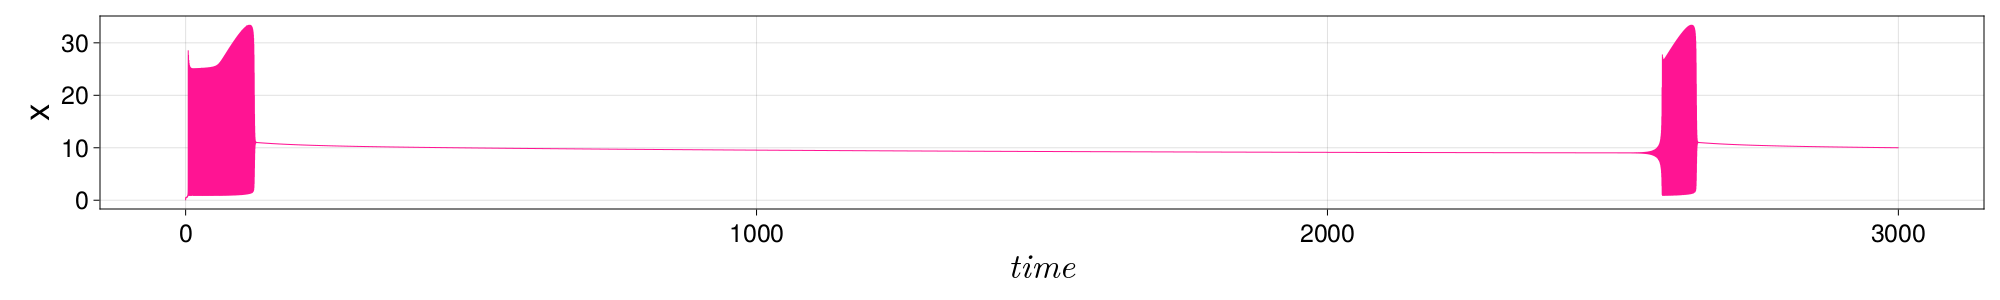

CairoMakie.Screen{IMAGE}


In [165]:
plot_timesereis(trange2, tr2[:, 1], 1, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

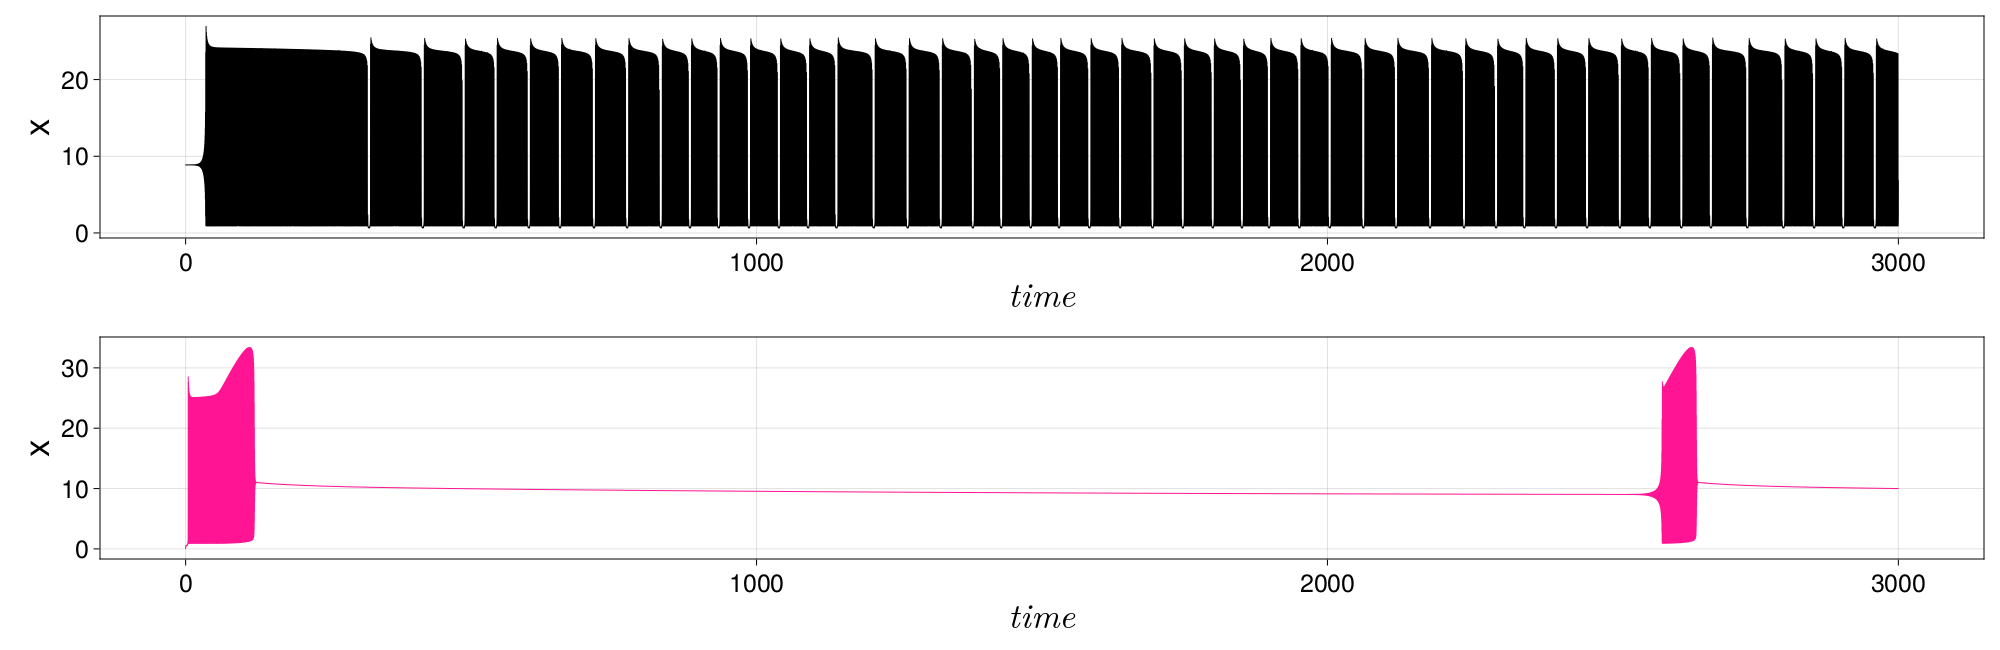

CairoMakie.Screen{IMAGE}


In [166]:
plot_timesereis_2f(trange1, trange2, tr1[:, 1], tr2[:, 1], 1, 3000000, width = 2000, height = 650, inter=false, lw = 1.0, color1 = :black, color2 = :deeppink)    

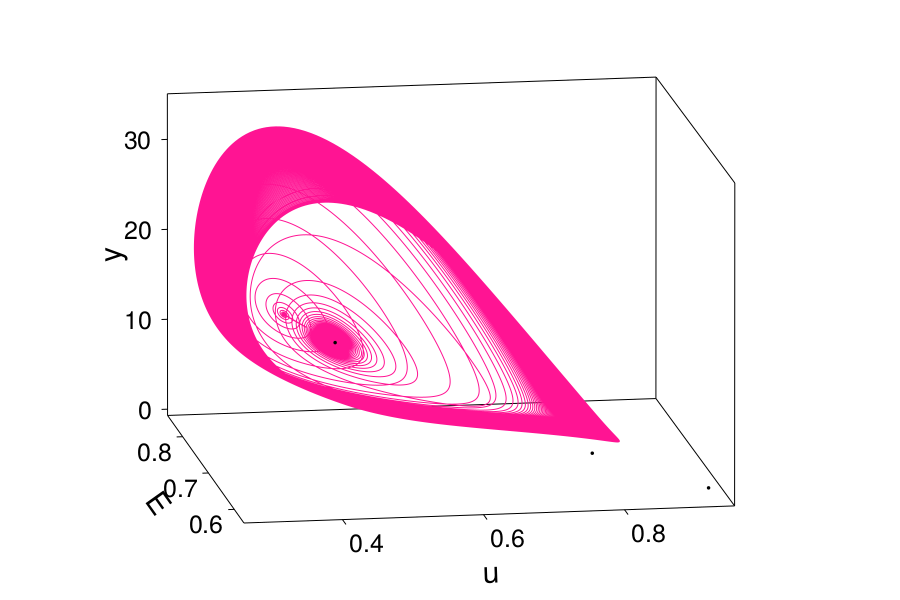

In [169]:
idx, idy, idz = 2, 3, 1
data = [tr2[:, idx], tr2[:, idy], tr2[:, idz]]
plot_3d_fp(data, [fp, idx, idy, idz], 2000000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "u", yl = "E", zl = "y", color = :deeppink);

In [ ]:
idx, idy, idz = 2, 3, 1# 2, 3, 1 # 3, 1, 4
data = [tr1[:, idx], tr2[:, idx], tr1[:, idy], tr2[:, idy], tr1[:, idz], tr2[:, idz]]
plot_3d_2c_fp(data, [fp, idx, idy, idz], 2000000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "u", yl = "E", zl = "y", color1 = :black, color2 = :deeppink, lw = 1.0);

In [ ]:
idx, idy, idz = 3, 1, 4
data = [tr1[:, idx], tr1[:, idy], tr1[:, idz]]
plot_3d_fp(data, [fp, idx, idy, idz], 1500000, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "u", yl = "E", zl = "y", color = :deeppink);